In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
# Sample data: number of users at each step
step_labels = ['Step 1: URL', 'Step 2: URL']
users = [255944, 34886]  # Example: 1000 users start, 600 proceed to the next step

In [6]:
# Calculate the drop-off percentage
drop_off = ((users[0] - users[1]) / users[0]) * 100

In [18]:
# Function to format the y-axis numbers with commas
def thousands_formatter(x, pos):
    return f'{int(x):,}'

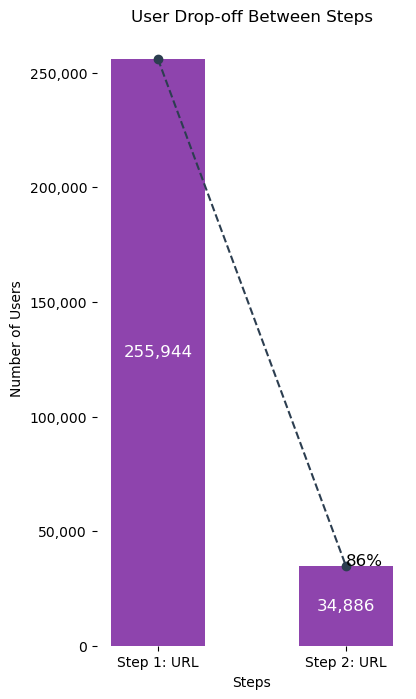

In [57]:
# Plotting the data with custom size
plt.figure(figsize=(4, 8))  # Set the desired width and height (in inches)
bar_width = 0.5  # Width of the bars
bar_positions = [0, 1]  # Positions for the bars

bars = plt.bar(step_labels, users, color=['#8e44ad', '#8e44ad'], width=bar_width)
plt.title('User Drop-off Between Steps')
plt.xlabel('Steps')
plt.ylabel('Number of Users')

# Add a line connecting the two bars
plt.plot([0, 1], [users[0], users[1]], color='#2c3e50', linestyle='--', marker='o')

# Annotate the drop-off percentage above the line
plt.text(1, users[1] + 200, f'{drop_off:.0f}%', ha='left', fontsize=12, color='black')
#plt.text(1, users[1] + 20, f'Drop-off: {drop_off:.2f}%', ha='center', fontsize=12, color='black')

# Adding value labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        yval / 2,                           # y position (middle of the bar)
        f'{int(yval):,}',                   # value text with thousands separator
        ha='center',                        # horizontal alignment
        va='center',                        # vertical alignment
        fontsize=12,                        # font size
        color='white' if yval > 200 else 'black' # text color based on bar height
    )

# Remove chart borders (spines)
ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Apply the thousands formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(bar_positions, step_labels)  # Ensure x-ticks match bar positions
plt.show()